In [1]:
# Team Project

from sklearn_pandas import DataFrameMapper
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from scipy.sparse import csr_matrix
import scikitplot as skplt
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier

emotions_list = [":)", ":(", ":p", ":D", "-_-", ":o"]
import wordcloud
stop_words = []


In [2]:
def preprocessing_text():
    for d, ln in zip(messages_data, token_4):
        token_1.append(d)
        token_2.append(d.count('$'))
        x =re.sub('[^0-9 ]+', '', d.lower())
        token_3.append(len(x))
        if (re.sub(r'[^://@]', '', d.lower())) is not '':
            token_6.append(1)
        else:
            token_6.append(0)
        token_7.append(len(x.split()))
        for emoji in emotions_list:
            if(re.search(re.escape(emoji), d)):
                token_8.append(1)
            else:
                token_8.append(0)
    return np.array(
        [np.array([token_1[i], token_2[i], token_3[i], token_4[i], token_6[i], token_7[i],token_8[i]], dtype=object) for i in
         range(len(messages_data))])


In [3]:

def text_process(mess):
    no_punct = re.sub('[^A-Za-z ]+', '', mess.lower())
    return np.array([stemmer.stem(word) for word in no_punct.split() if word not in stop_words])


In [4]:
def svm_fit():
    SVM = svm.SVC()
    SVM.fit(trainset, trainlabel)
    predicted_values_svm = SVM.predict(testset)
    acurracy_SVM = accuracy_score(testlabel, predicted_values_svm)
    print("acurracy_SVM " + str(acurracy_SVM))
    confusion_matrix_SVM = confusion_matrix(testlabel,predicted_values_svm,labels=["ham","spam"] )
    print(confusion_matrix_SVM)
    skplt.metrics.plot_confusion_matrix(testlabel,predicted_values_svm, normalize=True)
    plt.show()

In [5]:
def data_mapper():
    data = preprocessing_text()
    labels = ['message','f1','f2','f3','f4','f5','f6']
    df = pd.DataFrame.from_records(data,columns=labels)
    mapper = DataFrameMapper([
    (['f1', 'f2','f3','f4','f5','f6'], None),
    ('message',CountVectorizer(analyzer = text_process,ngram_range=(1, 1)))])
    X=mapper.fit_transform(df)
    return X

In [6]:
def plot_text(lable):
    words = ' '.join(list(messages[messages['v1'] == lable]['v2']))
    wc = WordCloud(width = 512,height = 512).generate(words)
    plt.figure(figsize = (10,8),facecolor = 'k')
    plt.imshow(wc)
    plt.axis('off')
    plt.show()


In [7]:
if __name__ == "__main__":
   
    messages = pd.read_csv("spam.csv", encoding='latin-1')
    messages = messages.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
    messages['length'] = messages['v2'].apply(len)
    messages_data = messages['v2']
    messages_labels = messages['v1']
    token_1 = []
    token_2 = []
    token_3 = []
    token_4 = messages['length']
    token_6 = []
    token_7 = []
    token_8 = []
    
    freq = pd.Series(' '.join(messages_data).split()).value_counts()
    stop_words = stopwords.words('english')
    stop_words.extend(freq[-9268:].index)
    
    mapped_data = data_mapper()
    trainset, testset, trainlabel, testlabel = train_test_split(mapped_data, messages_labels, test_size=0.33, random_state=42)



In [8]:
print(trainset)

[[ 0 19 92 ...  0  0  0]
 [ 0 12 59 ...  0  0  0]
 [ 0  3 28 ...  0  0  0]
 ...
 [ 0  4 45 ...  0  0  0]
 [ 0  4 26 ...  0  0  0]
 [ 0  7 35 ...  0  0  0]]


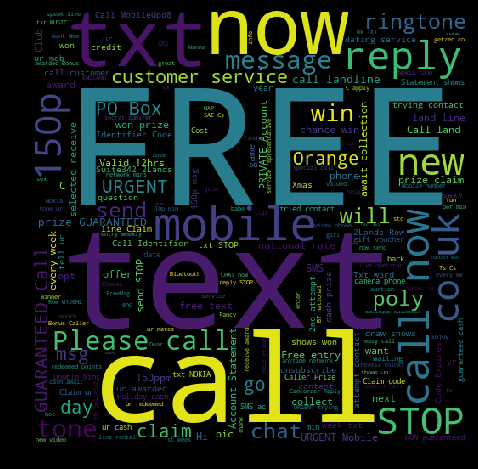

In [9]:
plot_text('spam')

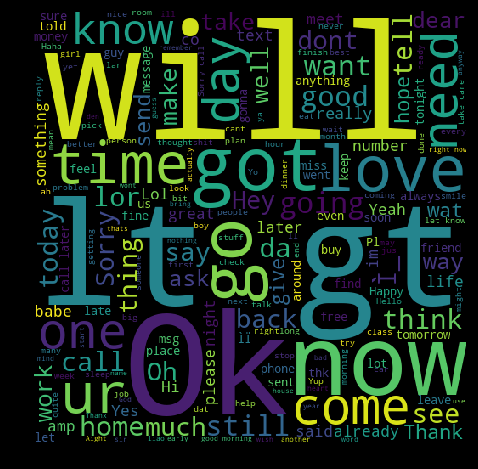

In [10]:
plot_text('ham')

acurracy_SVM 0.9581294181620446
[[1582    5]
 [  72  180]]


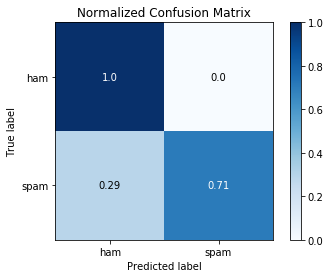

In [11]:
svm_fit()

In [ ]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='rbf', C=1)
scores = cross_val_score(clf, trainset, trainlabel, cv=5)
print(scores)                                              

In [ ]:
clf = MultinomialNB()
clf.fit(trainset, trainlabel)
predicted_values_svm = clf.predict(testset)
acurracy_SVM = accuracy_score(testlabel, predicted_values_svm)
print("acurracy_SVM " + str(acurracy_SVM))
confusion_matrix_SVM = confusion_matrix(testlabel,predicted_values_svm,labels=["ham","spam"])
print(confusion_matrix_SVM)
skplt.metrics.plot_confusion_matrix(testlabel,predicted_values_svm, normalize=False)
plt.show()


In [ ]:
clf = MultinomialNB()
scores = cross_val_score(clf, trainset, trainlabel, cv=5)
print(scores)                                              

In [ ]:
model = XGBClassifier()
model.fit(trainset,trainlabel)

In [ ]:
y_predict = model.predict(testset)
print(y_predict)
accuracy_XGBClassifier = accuracy_score(testlabel, y_predict)
print("acurracy_XGBClassifier " + str(accuracy_XGBClassifier))
confusion_matrix_SVM = confusion_matrix(testlabel,y_predict,labels=["ham","spam"] )
print(confusion_matrix_SVM)
skplt.metrics.plot_confusion_matrix(testlabel,y_predict, normalize=False)
plt.show()

In [ ]:
mess = "Need Some instant cash right now? Get up to 1000$.....TODAY! Reply YES for further info, or NO for UNSUBSCRIBE http://enterprise.com"
no_punct = re.sub('[^A-Za-z ]+', '', mess.lower())
print(np.array([stemmer.stem(word) for word in no_punct.split() if word not in stop_words]))
